In [32]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing import image
import tkinter as tk
from tkinter import filedialog
from tkinter import Label
from PIL import Image, ImageTk


In [14]:
base_dir = r'E:\DataScience Projects\prashant\chest_xray'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255) 

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
) 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (normal vs. pneumonia)
])

Hyper parameter tuning

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20


163/163 [==============================] - 210s 1s/step - loss: 0.4662 - accuracy: 0.7916 - val_loss: 0.7815 - val_accuracy: 0.6250
Epoch 2/20
163/163 [==============================] - 90s 550ms/step - loss: 0.2898 - accuracy: 0.8796 - val_loss: 0.5306 - val_accuracy: 0.8125
Epoch 3/20
163/163 [==============================] - 86s 527ms/step - loss: 0.2549 - accuracy: 0.8890 - val_loss: 0.3713 - val_accuracy: 0.8125
Epoch 4/20
163/163 [==============================] - 92s 564ms/step - loss: 0.2336 - accuracy: 0.9016 - val_loss: 0.4359 - val_accuracy: 0.7500
Epoch 5/20
163/163 [==============================] - 89s 544ms/step - loss: 0.2004 - accuracy: 0.9197 - val_loss: 0.4020 - val_accuracy: 0.8750
Epoch 6/20
163/163 [==============================] - 86s 526ms/step - loss: 0.2062 - accuracy: 0.9233 - val_loss: 0.6471 - val_accuracy: 0.7500
Epoch 7/20
163/163 [==============================] - 89s 546ms/step - loss: 0.1939 - accuracy: 0.9201 - val_loss: 0.8437 - val_ac

In [21]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

20/20 [==============================] - 12s 597ms/step - loss: 0.2780 - accuracy: 0.8942
Test accuracy: 0.8942


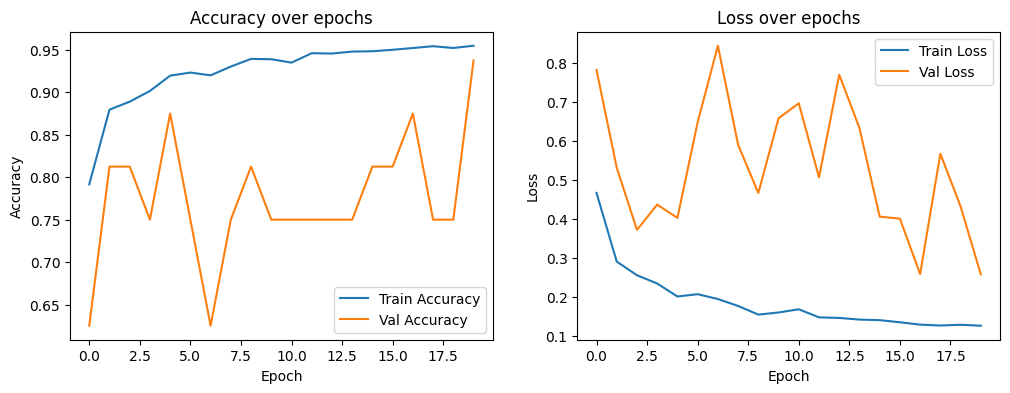

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [23]:


# Make predictions on the test set
y_pred = (model.predict(test_generator) > 0.5).astype("int32")
y_true = test_generator.classes

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


20/20 [==============================] - 5s 246ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       234
           1       0.88      0.96      0.92       390

    accuracy                           0.89       624
   macro avg       0.90      0.87      0.88       624
weighted avg       0.90      0.89      0.89       624

Confusion Matrix:
[[184  50]
 [ 16 374]]


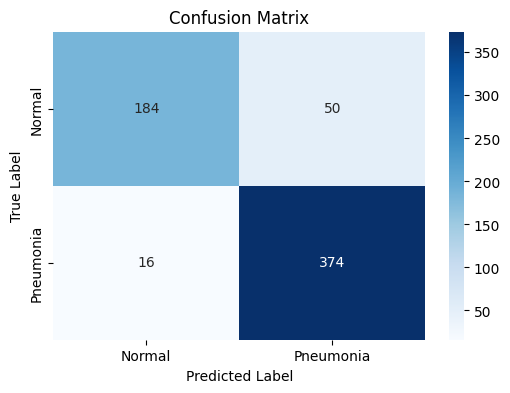

In [26]:
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

- Increase Dropout: Add or increase the dropout rate in your model layers.
- Early Stopping: Use early stopping to halt training once the validation loss starts to increase consistently.
- Data Augmentation: Apply more aggressive data augmentation to improve model robustness.
- Regularization: Add L2 regularization to convolutional or dense layers.

In [27]:
model.save('model.h5')

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
# Load the trained model (assuming it's saved in 'model.h5')
model = tf.keras.models.load_model('model.h5')

def preprocess_image(img_path):
    """Load and preprocess an image for prediction."""
    img = image.load_img(img_path, target_size=(128, 128))  # Resize to match model input
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize (same as during training)
    return img_array

def predict_image(img_path):
    """Predict if an image is 'normal' or 'pneumonia'."""
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    
    # Interpret the prediction
    if prediction[0][0] > 0.5:
        result = "Pneumonia"
        confidence = prediction[0][0]
    else:
        result = "Normal"
        confidence = 1 - prediction[0][0]
    
    print(f"Prediction: {result} with confidence {confidence:.2f}")
    return result, confidence

# Example usage:
img_path = img_path = r'E:\DataScience Projects\prashant\chest_xray\val\NORMAL\NORMAL2-IM-1427-0001.jpeg'
 # Replace with the path to your test image
predict_image(img_path)

1/1 [==============================] - 0s 119ms/step
Prediction: Normal with confidence 0.82


('Normal', 0.8224783092737198)

In [36]:
# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Function to predict and display result
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    
    if prediction[0][0] > 0.5:
        result = "Pneumonia"
        confidence = prediction[0][0]
    else:
        result = "Normal"
        confidence = 1 - prediction[0][0]
    
    result_label.config(text=f"Prediction: {result}\nConfidence: {confidence:.2f}")
    display_image(img_path)

# Function to display the uploaded image
def display_image(img_path):
    img = Image.open(img_path)
    img = img.resize((250, 250))
    img = ImageTk.PhotoImage(img)
    image_label.config(image=img)
    image_label.image = img

# Function to open a file dialog and select an image
def open_file():
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png")])
    if file_path:
        predict_image(file_path)

# Setting up the GUI
root = tk.Tk()
root.title("Chest X-Ray Classification")
root.geometry("400x400")

# Labels and buttons
image_label = Label(root)
image_label.pack()

result_label = Label(root, text="Upload an image to classify", font=("Arial", 14))
result_label.pack(pady=10)

upload_button = tk.Button(root, text="Upload Image", command=open_file, font=("Arial", 12))
upload_button.pack(pady=10)

# Run the GUI
root.mainloop()

1/1 [==============================] - 0s 44ms/step
